In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

os.makedirs('figures', exist_ok=True)

In [2]:
def read_csv_as_dict(filename):
    asdict = dict()
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
        for k in data[0]:
            asdict[k] = []
        for row in data[1:]:
            for i, k in enumerate(data[0]):
                asdict[k].append(row[i])
        for k in asdict.keys():
            asdict[k] = np.array(asdict[k], dtype=np.float64)
    return asdict

def plot_data(d, overlap, name, label=None):
    label = label or name
    idxs = [i for i, _ in enumerate(d['n']) if d['overlap'][i] == overlap]
    ns = d['n'][idxs]
    data = d[name][idxs]
    mins = d[f"{name}_min"][idxs]
    maxs = d[f"{name}_max"][idxs]
    plt.plot(ns, data, label=label)
    plt.fill_between(ns, mins, maxs, alpha=0.10)

def plot_per_elem(d, overlap, name, label=None):
    label = label or name
    idxs = [i for i, _ in enumerate(d['n']) if d['overlap'][i] == overlap]
    ns = d['n'][idxs]
    data = d[name][idxs] / ns
    mins = d[f"{name}_min"][idxs] / ns
    maxs = d[f"{name}_max"][idxs] / ns
    plt.plot(ns, data, label=label)
    plt.fill_between(ns, mins, maxs, alpha=0.10)

def plot_all(d, overlap, title):
    plot_data(d, overlap, 'original', 'Original')
    plot_data(d, overlap, 'compose', 'Composed')
    plot_data(d, overlap, 'linq', 'LINQ Intersect')
    plot_data(d, overlap, 'hashset', 'HashSet')
    plot_data(d, overlap, 'frozenset', 'FrozenSet')
    plot_data(d, overlap, 'par_std', 'PLINQ Intersect')
    plot_data(d, overlap, 'par_hashset', 'PLINQ HashSet')
    plot_data(d, overlap, 'par_std_partition', 'PLINQ Intersect Partition')
    plot_data(d, overlap, 'par_hashset_partition', 'PLINQ HashSet Partition')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('Number of elements')
    plt.ylabel('Time (us)')
    plt.title(title)

def plot_all_per_elem(d, overlap, title):
    plot_per_elem(d, overlap, 'original', 'Original')
    plot_per_elem(d, overlap, 'compose', 'Composed')
    plot_per_elem(d, overlap, 'linq', 'LINQ Intersect')
    plot_per_elem(d, overlap, 'hashset', 'HashSet')
    plot_per_elem(d, overlap, 'frozenset', 'FrozenSet')
    plot_per_elem(d, overlap, 'par_std', 'PLINQ Intersect')
    plot_per_elem(d, overlap, 'par_hashset', 'PLINQ HashSet')
    plot_per_elem(d, overlap, 'par_std_partition', 'PLINQ Intersect Partition')
    plot_per_elem(d, overlap, 'par_hashset_partition', 'PLINQ HashSet Partition')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('Number of elements')
    plt.ylabel('Time per element (us)')
    plt.title(title)

def plot_overlap(d, label, title):
    for i in range(10):
        plot_data(d, (i+1)*10, label, f'{(i+1)*10}%')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('Number of elements')
    plt.ylabel('Time (us)')
    plt.title(label)

def plot_overlap_grid(d, title):
    names = ['original', 'compose', 'linq', 'hashset', 'frozenset', 'par_std', 'par_hashset', 'par_std_partition', 'par_hashset_partition']
    plt.suptitle(title, y=.9)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plot_overlap(d, names[i], title)

def plot_and_print_best(ds, title):
    plt.figure(figsize=(20, 10))
    plot_all(ds, 50, title)
    compose_speedups = [ds['original'][i] / ds['compose'][i] for i in range(len(ds['n']))]
    intersect_speedups = [ds['original'][i] / ds['linq'][i] for i in range(len(ds['n']))]
    hashset_speedups = [ds['original'][i] / ds['hashset'][i] for i in range(len(ds['n']))]
    frozenset_speedups = [ds['original'][i] / ds['frozenset'][i] for i in range(len(ds['n']))]
    par_std_speedups = [ds['original'][i] / ds['par_std'][i] for i in range(len(ds['n']))]
    par_hashset_speedups = [ds['original'][i] / ds['par_hashset'][i] for i in range(len(ds['n']))]
    par_std_partition_speedups = [ds['original'][i] / ds['par_std_partition'][i] for i in range(len(ds['n']))]
    par_hashset_partition_speedups = [ds['original'][i] / ds['par_hashset_partition'][i] for i in range(len(ds['n']))]
    print ('Best cases:')
    print (f'Compose is {max(compose_speedups):.00f} times faster than the original')
    print (f'Intersect is {max(intersect_speedups):.00f} times faster than the original')
    print (f'HashSet is {max(hashset_speedups):.00f} times faster than original')
    print (f'FrozenSet is {max(frozenset_speedups):.00f} times faster than original')
    print (f'PLINQ Intersect is {max(par_std_speedups):.00f} times faster than original')
    print (f'PLINQ HashSet is {max(par_hashset_speedups):.00f} times faster than original')
    print (f'PLINQ Intersect Partition is {max(par_std_partition_speedups):.00f} times faster than original')
    print (f'PLINQ HashSet Partition is {max(par_hashset_partition_speedups):.00f} times faster than original')

Best cases:
Compose is 3 times faster than the original
Intersect is 951 times faster than the original
HashSet is 1088 times faster than original
FrozenSet is 170 times faster than original
PLINQ Intersect is 1483 times faster than original
PLINQ HashSet is 1321 times faster than original
PLINQ Intersect Partition is 1411 times faster than original
PLINQ HashSet Partition is 1367 times faster than original


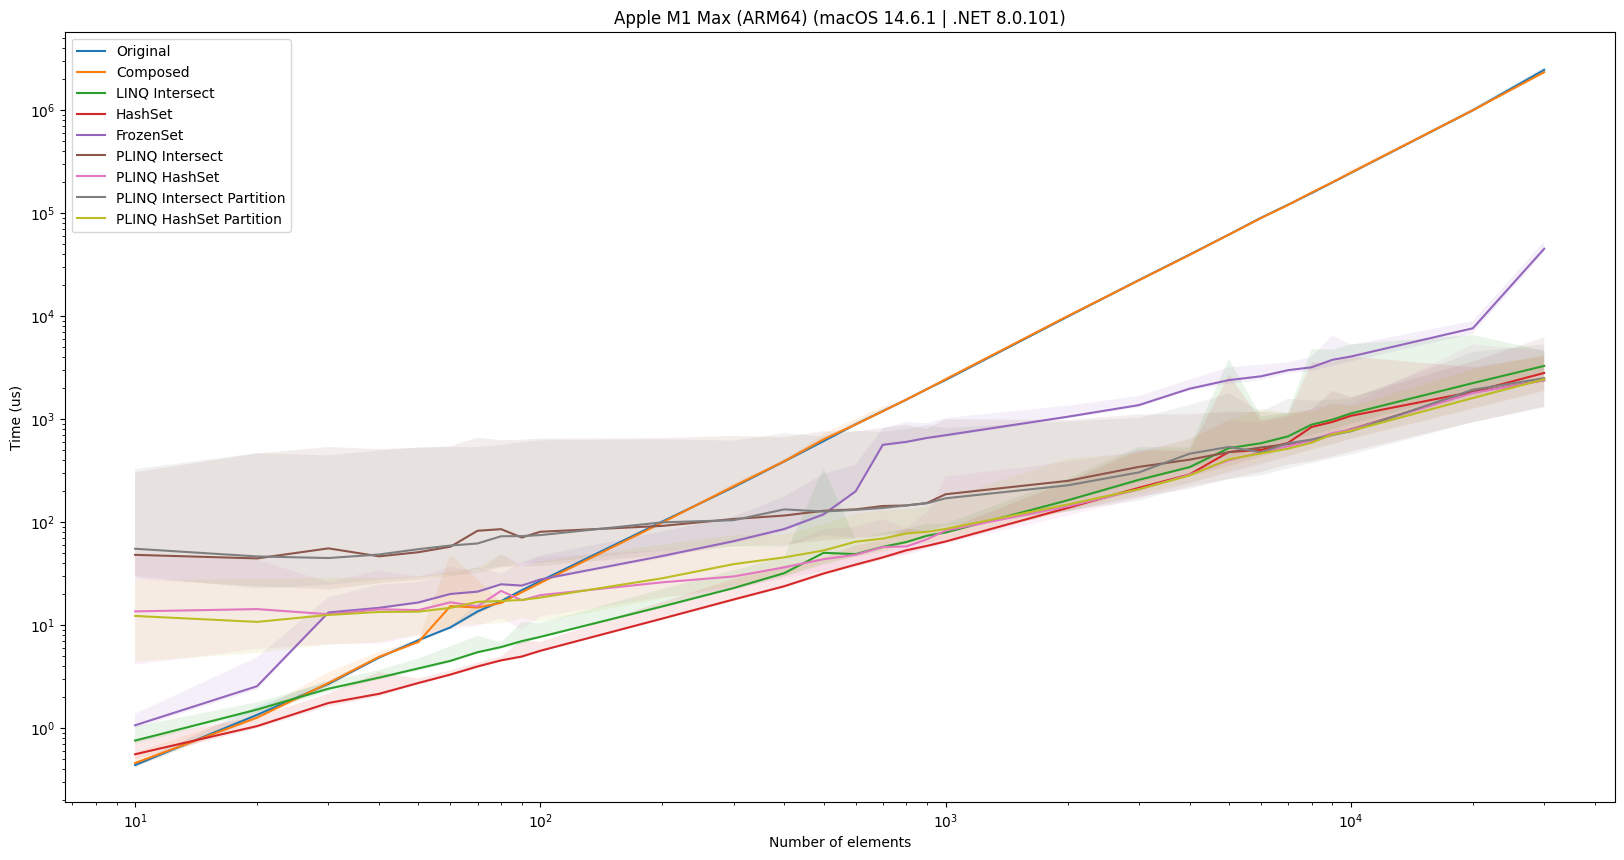

In [3]:
mac = read_csv_as_dict('data/results_mac.csv')
mac_title = 'Apple M1 Max (ARM64) (macOS 14.6.1 | .NET 8.0.101)'
plot_and_print_best(mac, mac_title)
plt.savefig('figures/mac_scaling.png')

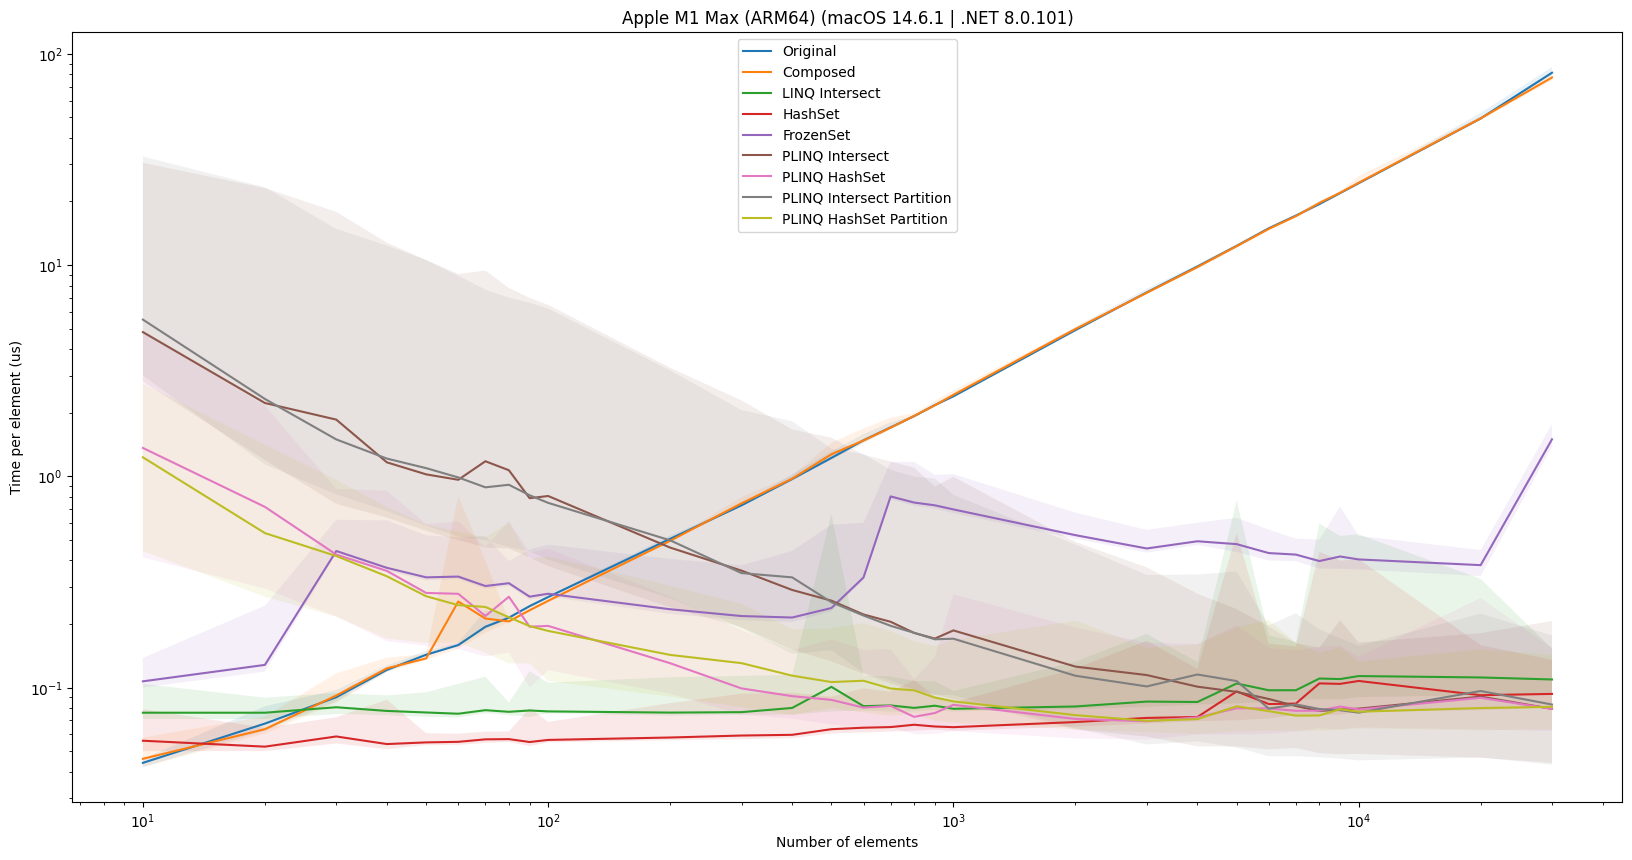

In [4]:
plt.figure(figsize=(20, 10))
plot_all_per_elem(mac, 50, mac_title)
plt.savefig('figures/mac_per_elem.png')

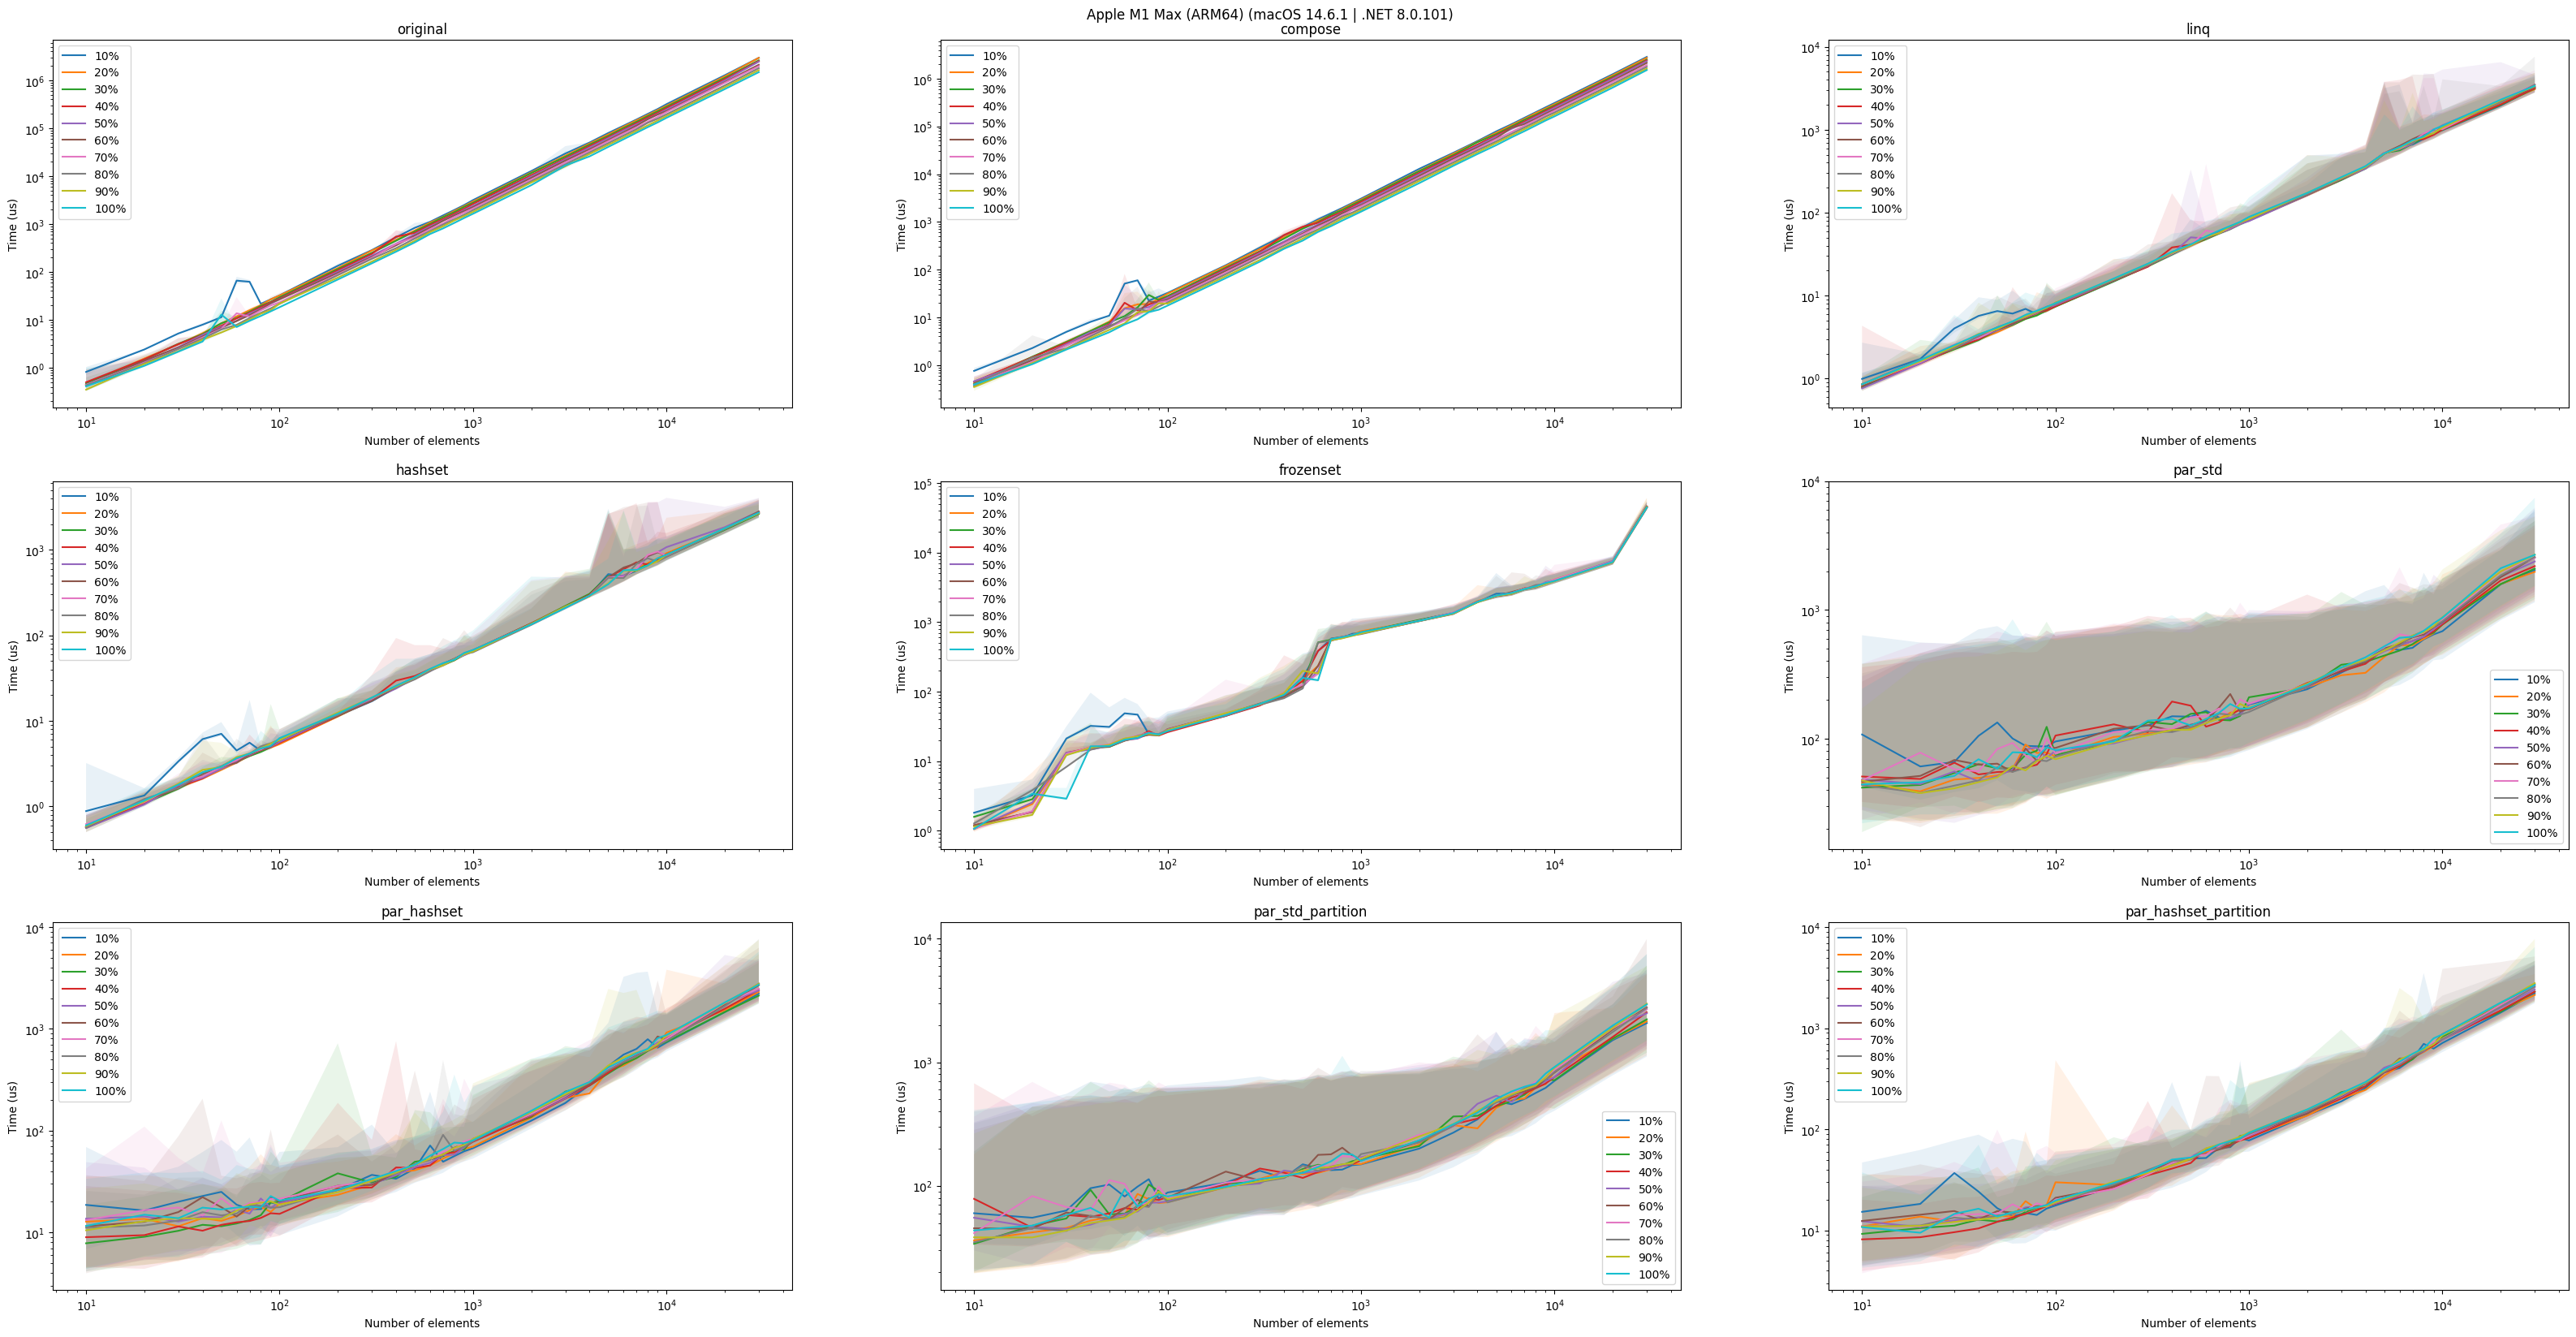

In [5]:
plt.figure(figsize=(40, 20))
plot_overlap_grid(mac, mac_title)
plt.savefig('figures/overlap.png')

Best cases:
Compose is 2 times faster than the original
Intersect is 2225 times faster than the original
HashSet is 2432 times faster than original
FrozenSet is 317 times faster than original
PLINQ Intersect is 1665 times faster than original
PLINQ HashSet is 2458 times faster than original
PLINQ Intersect Partition is 1825 times faster than original
PLINQ HashSet Partition is 2648 times faster than original


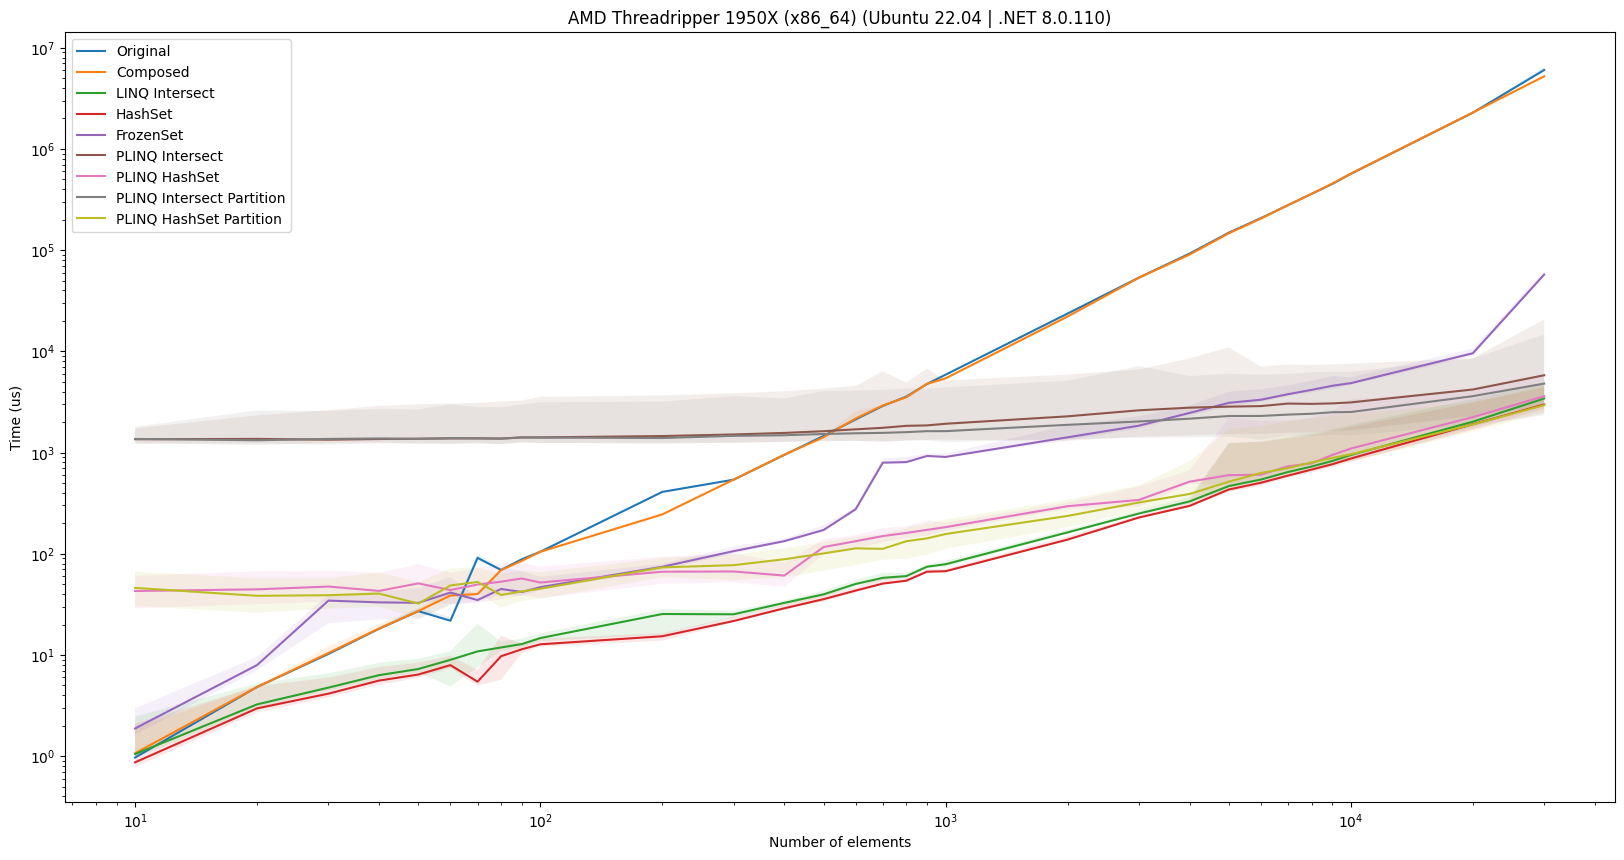

In [6]:
t00 = read_csv_as_dict('data/results_threadripper00.csv')
t00_title = 'AMD Threadripper 1950X (x86_64) (Ubuntu 22.04 | .NET 8.0.110)'
plot_and_print_best(t00, t00_title)
plt.savefig('figures/t00_scaling.png')

Best cases:
Compose is 2 times faster than the original
Intersect is 1491 times faster than the original
HashSet is 1681 times faster than original
FrozenSet is 236 times faster than original
PLINQ Intersect is 200 times faster than original
PLINQ HashSet is 1686 times faster than original
PLINQ Intersect Partition is 435 times faster than original
PLINQ HashSet Partition is 1819 times faster than original


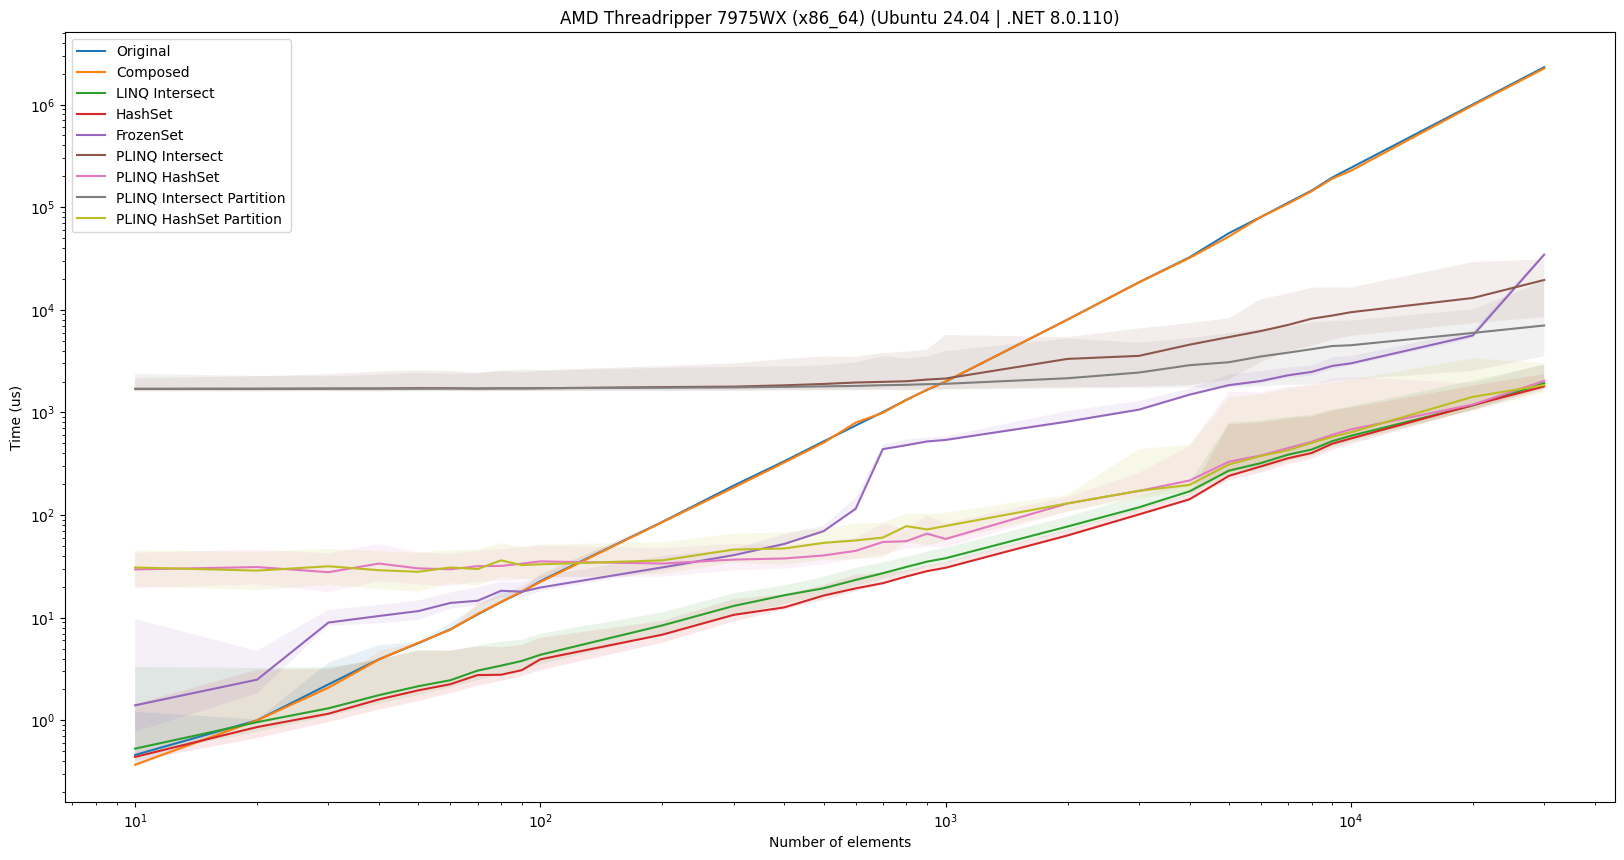

In [7]:
t02 = read_csv_as_dict('data/results_threadripper02.csv')
t02_title = 'AMD Threadripper 7975WX (x86_64) (Ubuntu 24.04 | .NET 8.0.110)'
plot_and_print_best(t02, t02_title)
plt.savefig('figures/t02_scaling.png')

Best cases:
Compose is 2 times faster than the original
Intersect is 2232 times faster than the original
HashSet is 2879 times faster than original
FrozenSet is 234 times faster than original
PLINQ Intersect is 3441 times faster than original
PLINQ HashSet is 3776 times faster than original
PLINQ Intersect Partition is 3200 times faster than original
PLINQ HashSet Partition is 3439 times faster than original


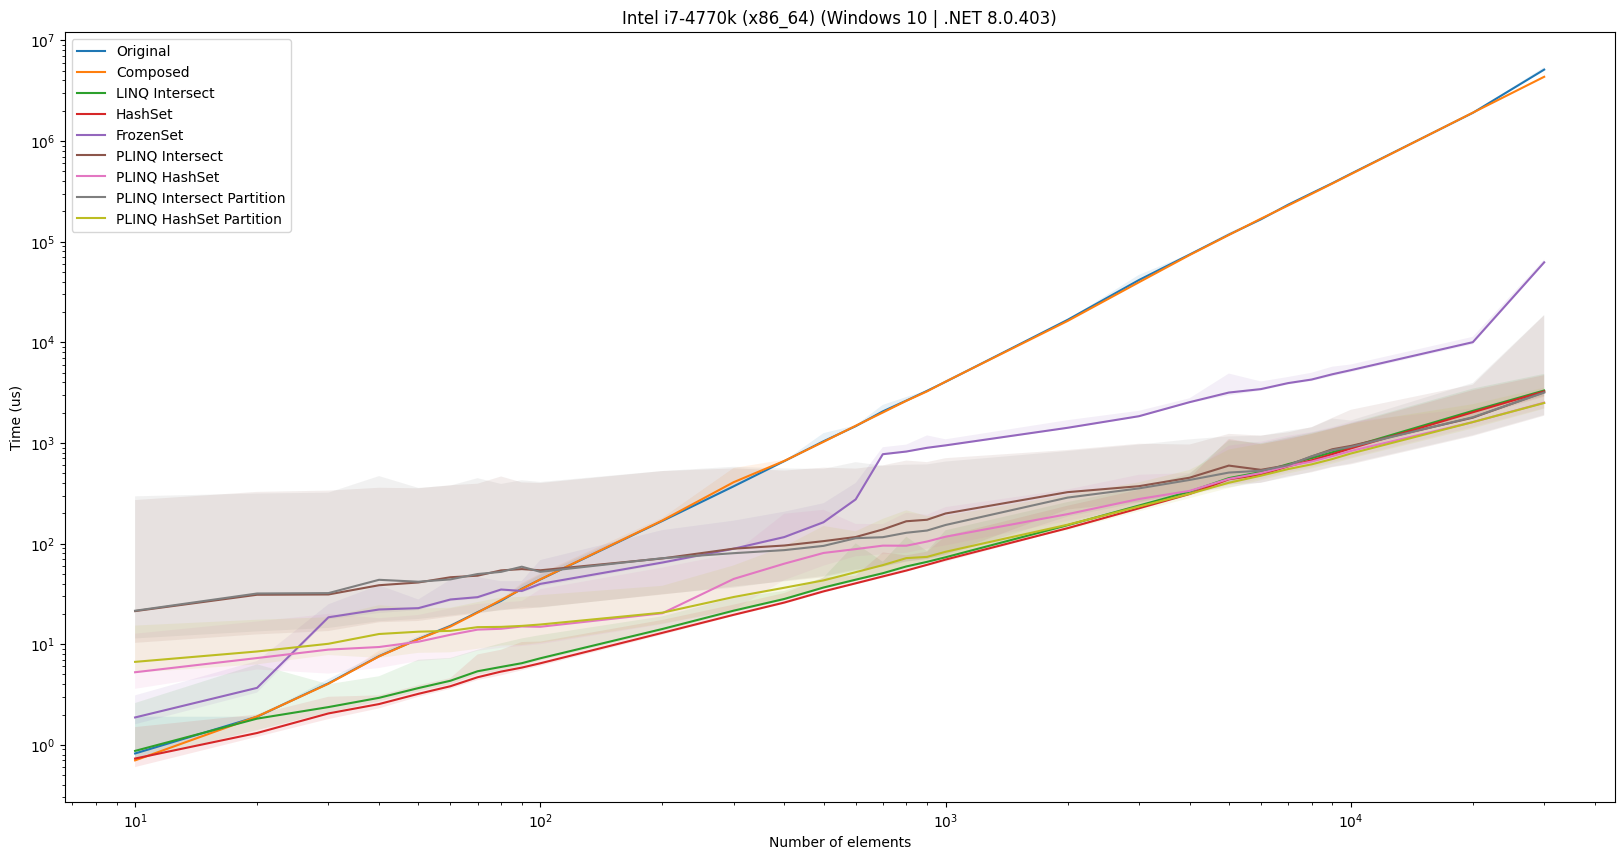

In [8]:
win = read_csv_as_dict('data/results_win.csv')
win_title = 'Intel i7-4770k (x86_64) (Windows 10 | .NET 8.0.403)'
plot_and_print_best(win, win_title)
plt.savefig('figures/win_scaling.png')

Best cases:
Compose is 2 times faster than the original
Intersect is 2201 times faster than the original
HashSet is 2397 times faster than original
FrozenSet is 320 times faster than original
PLINQ Intersect is 4719 times faster than original
PLINQ HashSet is 3193 times faster than original
PLINQ Intersect Partition is 4896 times faster than original
PLINQ HashSet Partition is 3129 times faster than original


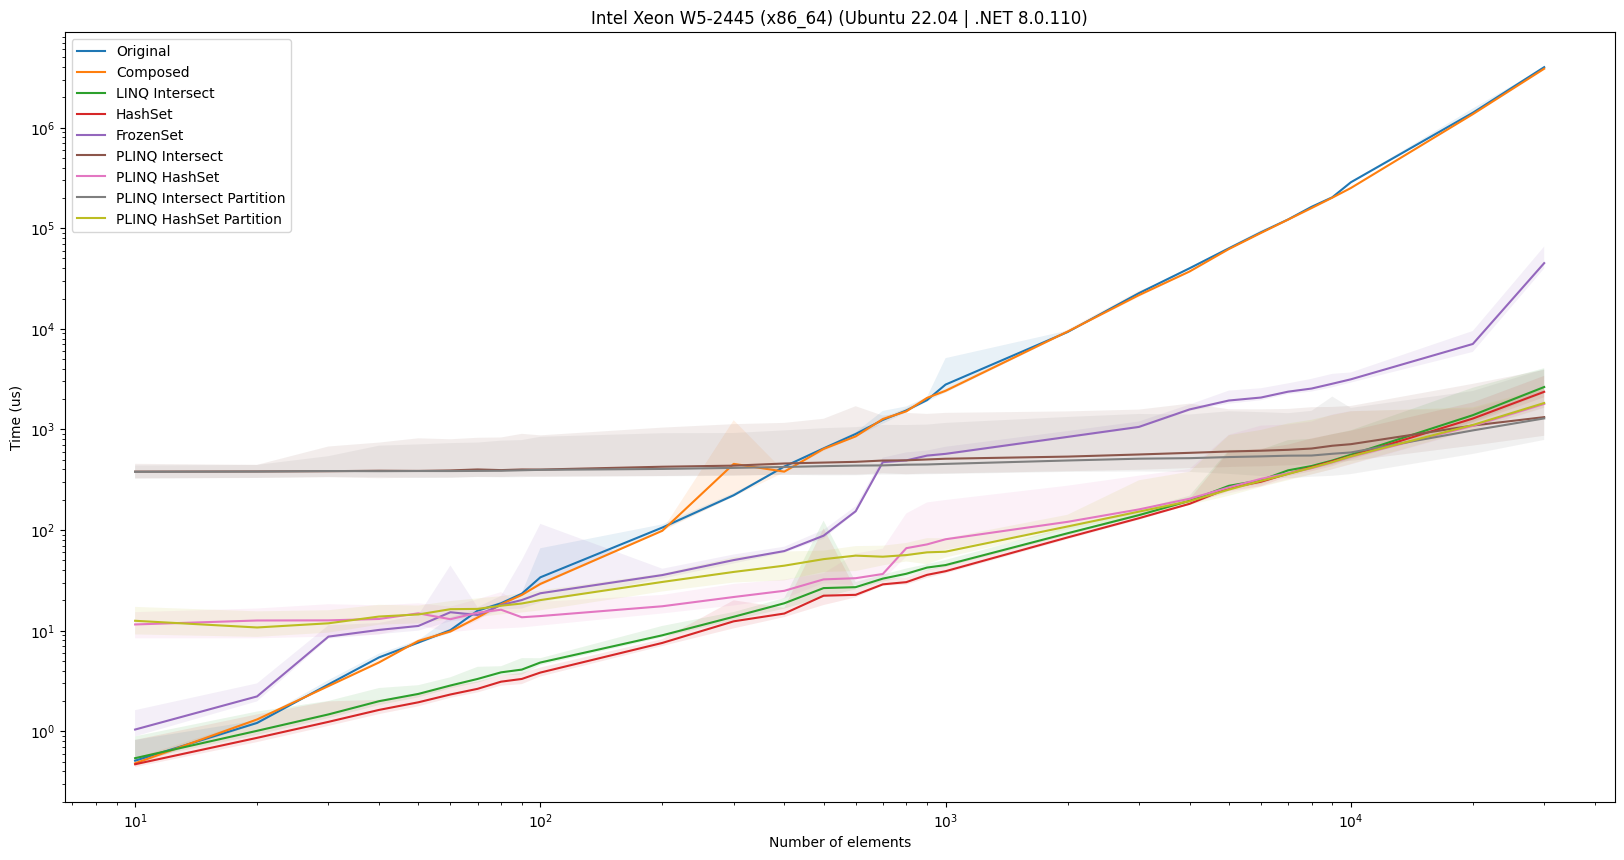

In [9]:
w5 = read_csv_as_dict('data/results_w52445.csv')
w5_title = 'Intel Xeon W5-2445 (x86_64) (Ubuntu 22.04 | .NET 8.0.110)'
plot_and_print_best(w5, w5_title)
plt.savefig('figures/w5_scaling.png')

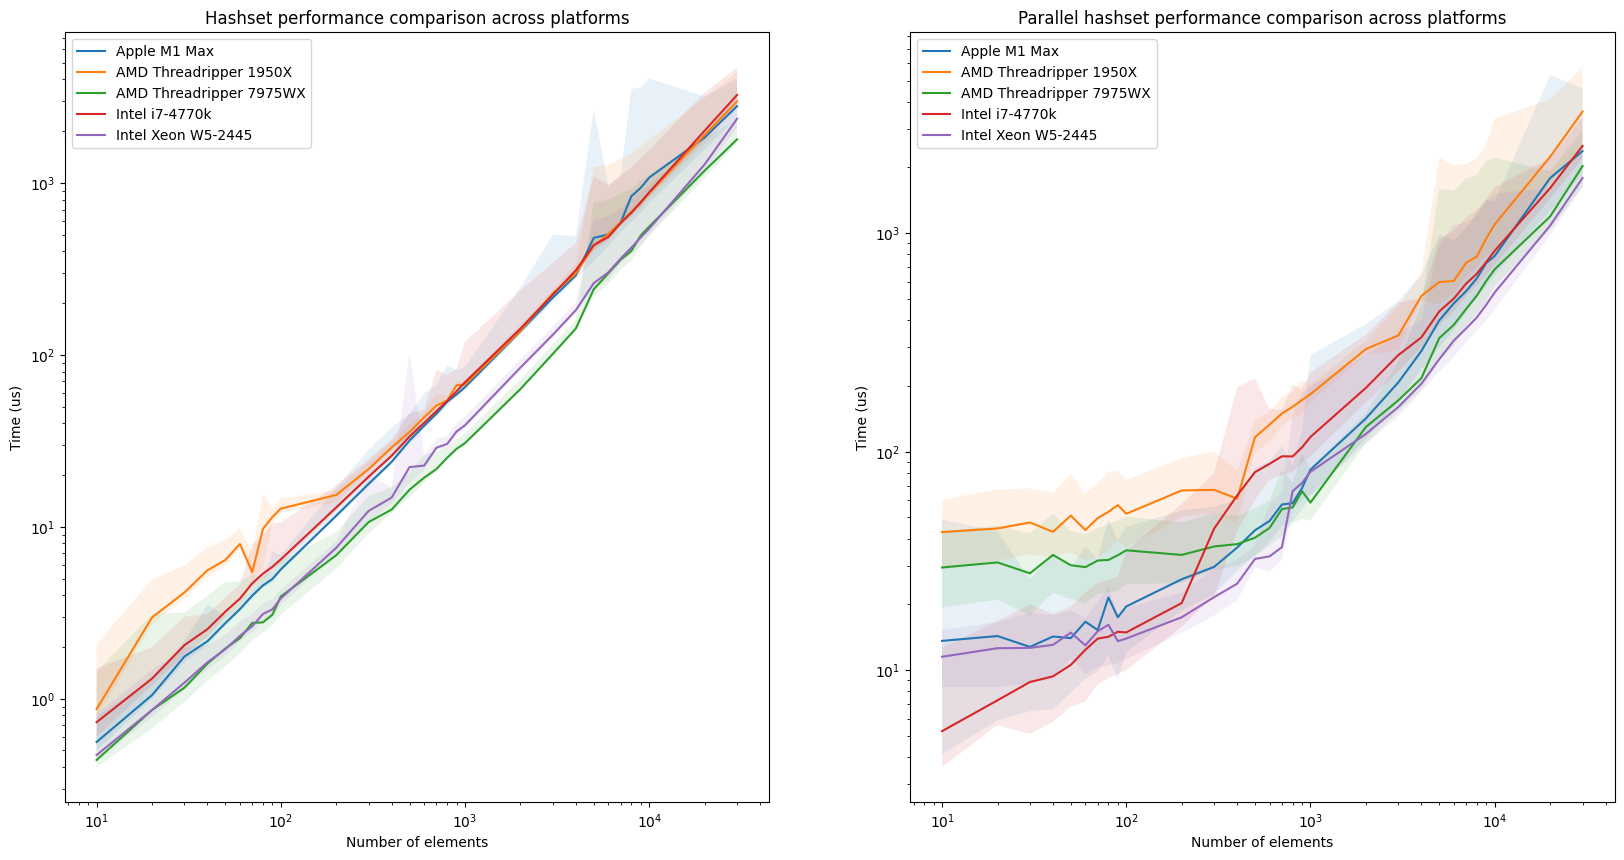

In [10]:
to_plot = [
    (mac, 'Apple M1 Max'),
    (t00, 'AMD Threadripper 1950X'),
    (t02, 'AMD Threadripper 7975WX'),
    (win, 'Intel i7-4770k'),
    (w5, 'Intel Xeon W5-2445')
]
plt.figure(figsize=(20, 10))
plt.subplot(121)
for d, label in to_plot:
    plot_data(d, 50, 'hashset', label=label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of elements')
plt.ylabel('Time (us)')
plt.legend()
plt.title('Hashset performance comparison across platforms')

plt.subplot(122)
for d, label in to_plot:
    plot_data(d, 50, 'par_hashset', label=label)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of elements')
plt.ylabel('Time (us)')
plt.legend()
plt.title('Parallel hashset performance comparison across platforms')
plt.savefig('figures/cross_platform.png')